## cat vs dogs first try nn

In [2]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2024-12-05 10:12:19.111947: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-05 10:12:19.112059: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-05 10:12:19.162972: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 10:12:19.257127: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-05 10:12:20.617504: W tensorflow/compiler/tf2

2.15.0


In [3]:
import os 
import zipfile 

# local_zip = '/home/mstorresh/ML/libro_Jordi/cats_and_dogs_small.zip'

# zip_ref = zipfile.ZipFile(local_zip, 'r')

# zip_ref.extractall('/home/mstorresh/ML/libro_Jordi/')
# zip_ref.close()

In [4]:
base_dir = '/home/mstorresh/ML/libro_Jordi/cats_and_dogs_small'

train_dir =      os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir =       os.path.join(base_dir, 'test')

# Directorio con las imagenes de training 
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directorio con las imagenes de validation
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Directorio con las imagenes de test
test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [5]:
train_cat_fnames = os.listdir( train_cats_dir )
print(train_cat_fnames[:5])

train_dog_fnames = os.listdir( train_dogs_dir )
print(train_dog_fnames[:5])

validation_cat_fnames = os.listdir( validation_cats_dir )
print(validation_cat_fnames[:5])

validation_dog_fnames = os.listdir( validation_dogs_dir )
print(validation_dog_fnames[:5])

test_cat_fnames = os.listdir( test_cats_dir )
print(test_cat_fnames[:5])

test_dog_fnames = os.listdir( test_dogs_dir )
print(test_dog_fnames[:5])

['cat.2.jpg', 'cat.615.jpg', 'cat.424.jpg', 'cat.977.jpg', 'cat.8.jpg']
['dog.779.jpg', 'dog.139.jpg', 'dog.620.jpg', 'dog.646.jpg', 'dog.486.jpg']
['cat.1399.jpg', 'cat.1205.jpg', 'cat.1078.jpg', 'cat.1234.jpg', 'cat.1042.jpg']
['dog.1005.jpg', 'dog.1187.jpg', 'dog.1057.jpg', 'dog.1472.jpg', 'dog.1388.jpg']
['cat.1707.jpg', 'cat.1513.jpg', 'cat.1804.jpg', 'cat.1865.jpg', 'cat.1574.jpg']
['dog.1988.jpg', 'dog.1689.jpg', 'dog.1508.jpg', 'dog.1987.jpg', 'dog.1538.jpg']


In [6]:
print(test_dog_fnames[0])

dog.1988.jpg


In [7]:
print('total training cat images :', len(os.listdir(train_cats_dir ) ))
print('total training dog images :', len(os.listdir(train_dogs_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

print('total test cat images :', len(os.listdir( test_cats_dir ) ))
print('total test dog images :', len(os.listdir( test_dogs_dir ) ))


total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500
total test cat images : 500
total test dog images : 500


Figura 10.3


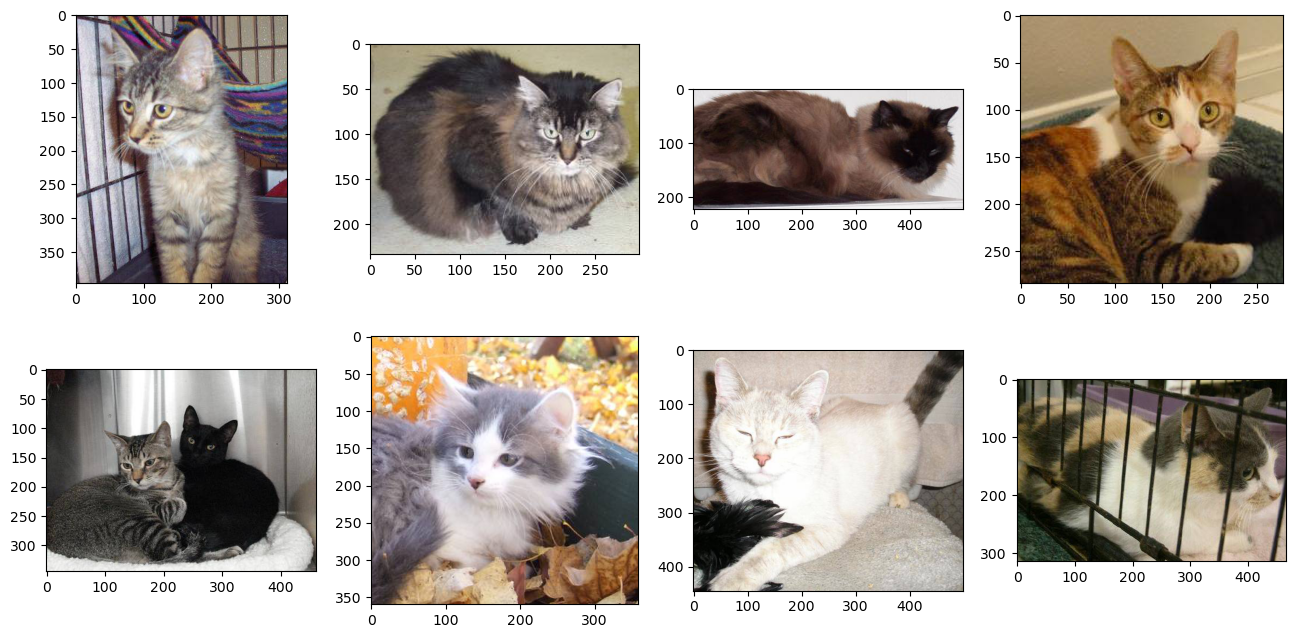

Figura 10.4


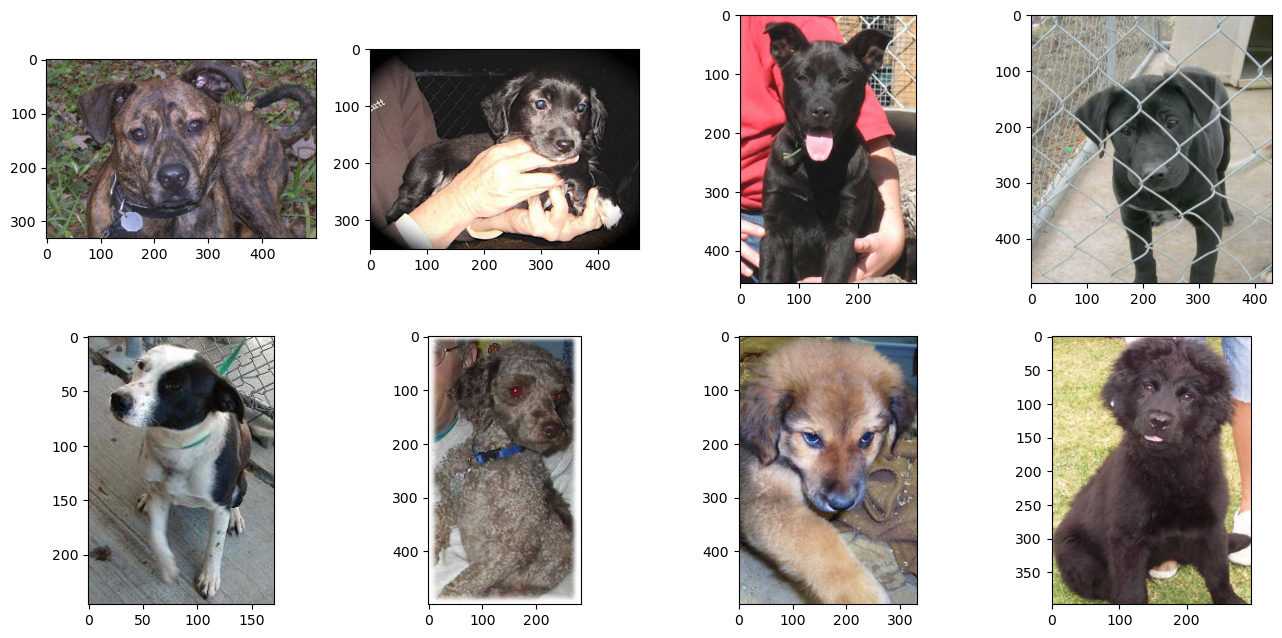

Figura 10.5


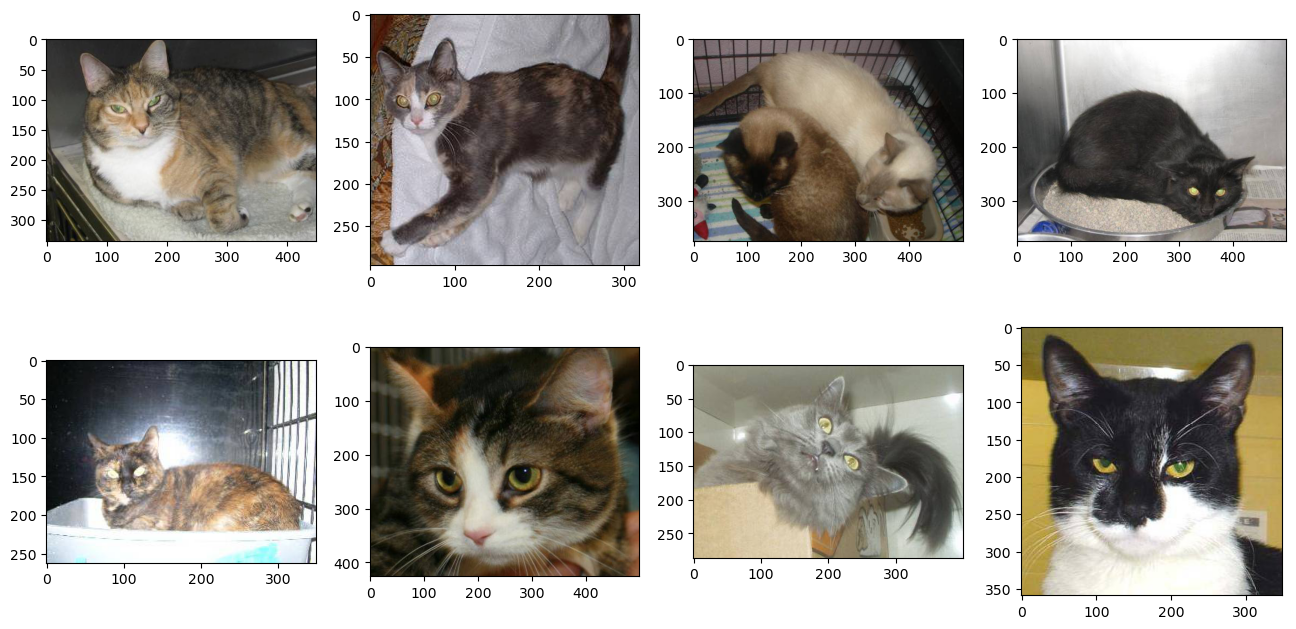

Figura 10.6


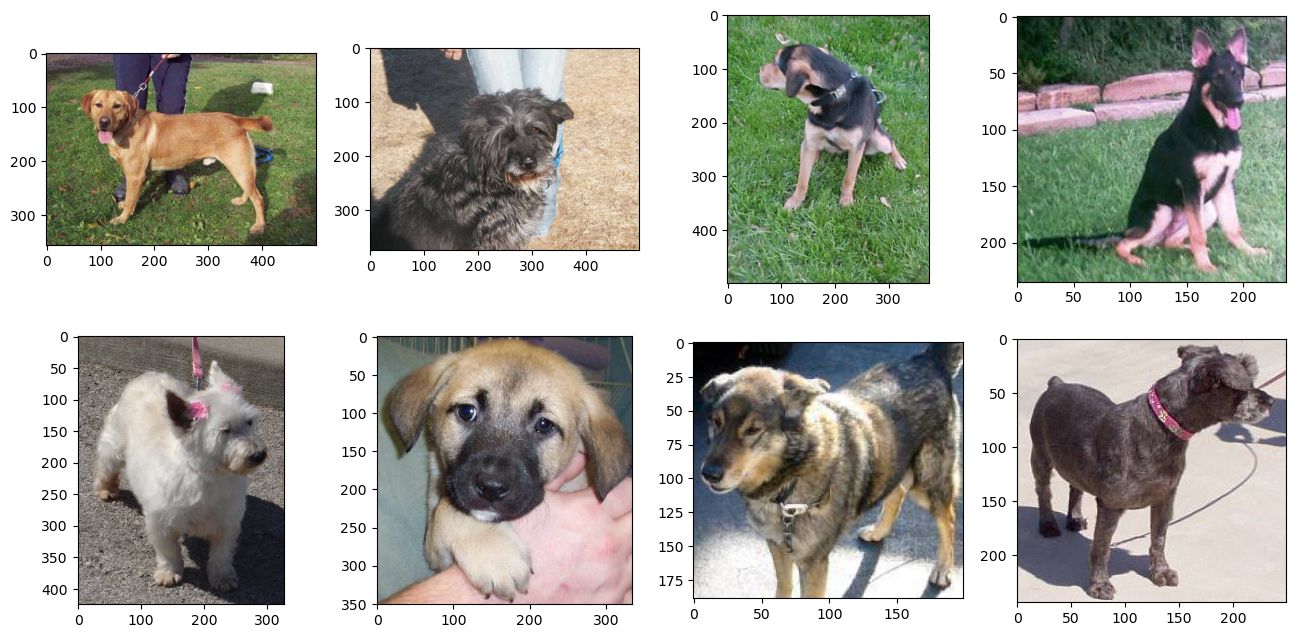

Figura 10.7


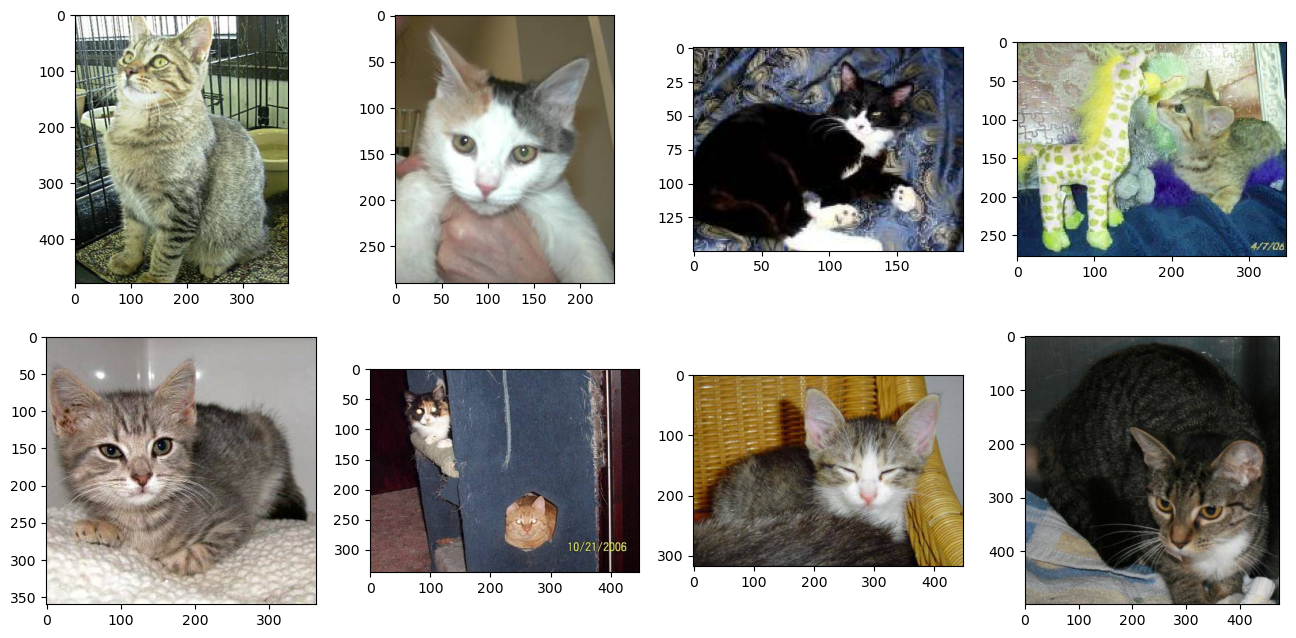

Figura 10.8


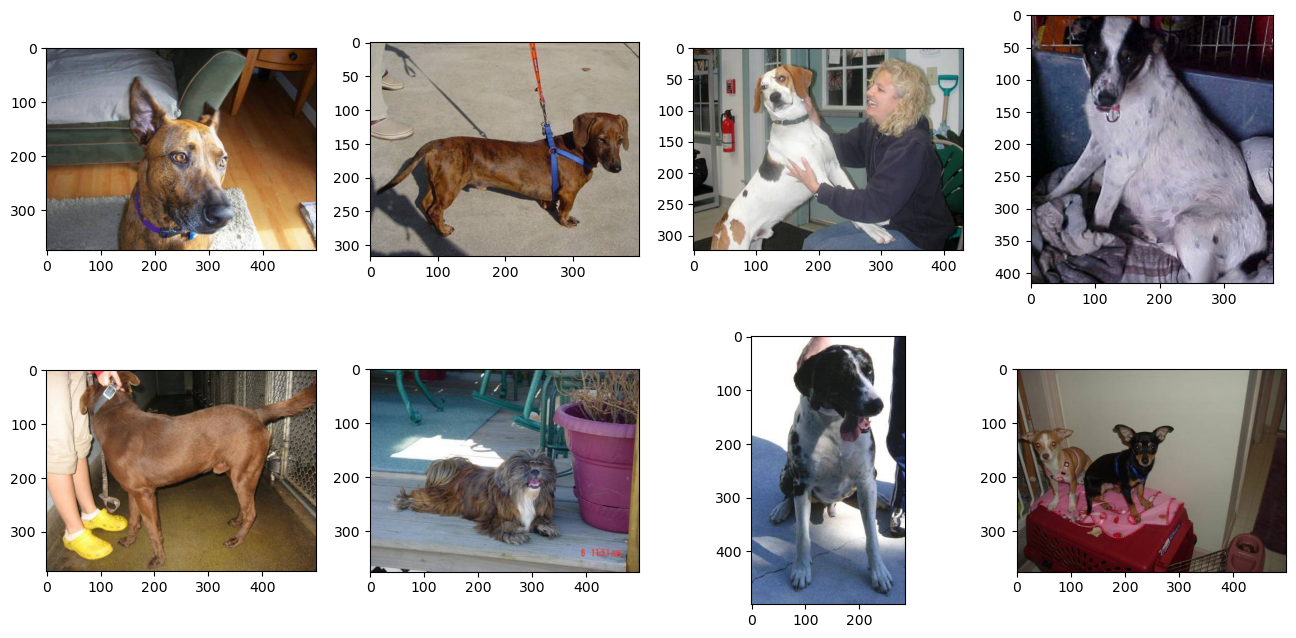

In [8]:

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

def print_pictures(dir, fnames):
  # presentaremos images en una configuración de 4x4
  nrows = 4
  ncols = 4

  pic_index = 0 # Índice para iterar sobre las imagenes

  fig = plt.gcf()
  fig.set_size_inches(ncols*4, nrows*4)

  pic_index+=8

  next_pix = [os.path.join(dir, fname) 
                for fname in fnames[ pic_index-8:pic_index] 
               ]

  for i, img_path in enumerate(next_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    img = mpimg.imread(img_path)
    plt.imshow(img)

  plt.show()

  
print("Figura 10.3")
print_pictures(train_cats_dir, train_cat_fnames)
print("Figura 10.4")
print_pictures(train_dogs_dir, train_dog_fnames)
print("Figura 10.5")
print_pictures(validation_cats_dir, validation_cat_fnames)
print("Figura 10.6")
print_pictures(validation_dogs_dir, validation_dog_fnames)
print("Figura 10.7")
print_pictures(test_cats_dir, test_cat_fnames)
print("Figura 10.8")
print_pictures(test_dogs_dir, test_dog_fnames)

# Basic model

In [9]:
import tensorflow as tf 
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


def nn_cats():
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
    model.add(MaxPooling2D(2,2))
    model.add(Conv2D(64,(3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.1))
    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Dropout(0.1))
    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(MaxPooling2D(2,2))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    return model 

In [10]:
model = nn_cats()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 36, 36, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       7

2024-12-05 10:12:31.200109: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-05 10:12:31.362692: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [11]:
from tensorflow.keras.optimizers import RMSprop

optimizer = tf.keras.optimizers.Adam(lr=0.001)

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics = ['acc'])


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator( rescale = 1.0/255.)
validation_datagen = ImageDataGenerator( rescale = 1.0/255.)
test_datagen = ImageDataGenerator( rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size=20, 
                                                    class_mode='binary', 
                                                    target_size=(150,150))

validation_generator = validation_datagen.flow_from_directory(validation_dir, batch_size=20, 
                                                    class_mode='binary', 
                                                    target_size=(150,150))

test_generator = test_datagen.flow_from_directory(test_dir, batch_size=20, 
                                                    class_mode='binary', 
                                                    target_size=(150,150))



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
batch_size: int = 20 
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

steps_per_epoch, validation_steps

(100, 50)

In [14]:
history = model.fit( train_generator, steps_per_epoch= steps_per_epoch,
                    epochs=100, validation_data=validation_generator,
                    validation_steps=validation_steps, verbose=2)

Epoch 1/100
100/100 - 33s - loss: 0.7095 - acc: 0.5040 - val_loss: 0.6898 - val_acc: 0.5430 - 33s/epoch - 326ms/step
Epoch 2/100
100/100 - 33s - loss: 0.6945 - acc: 0.4965 - val_loss: 0.6927 - val_acc: 0.5220 - 33s/epoch - 329ms/step
Epoch 3/100
100/100 - 32s - loss: 0.6927 - acc: 0.5105 - val_loss: 0.6915 - val_acc: 0.5190 - 32s/epoch - 316ms/step
Epoch 4/100
100/100 - 32s - loss: 0.6879 - acc: 0.5250 - val_loss: 0.6832 - val_acc: 0.5470 - 32s/epoch - 316ms/step
Epoch 5/100
100/100 - 31s - loss: 0.6879 - acc: 0.5415 - val_loss: 0.6877 - val_acc: 0.5340 - 31s/epoch - 309ms/step
Epoch 6/100
100/100 - 30s - loss: 0.6833 - acc: 0.5500 - val_loss: 0.6837 - val_acc: 0.5730 - 30s/epoch - 298ms/step
Epoch 7/100
100/100 - 29s - loss: 0.6765 - acc: 0.5630 - val_loss: 0.6971 - val_acc: 0.5190 - 29s/epoch - 293ms/step
Epoch 8/100
100/100 - 29s - loss: 0.6755 - acc: 0.5625 - val_loss: 0.6887 - val_acc: 0.5620 - 29s/epoch - 292ms/step
Epoch 9/100
100/100 - 30s - loss: 0.6635 - acc: 0.5730 - val_los

In [15]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


<Figure size 640x480 with 0 Axes>

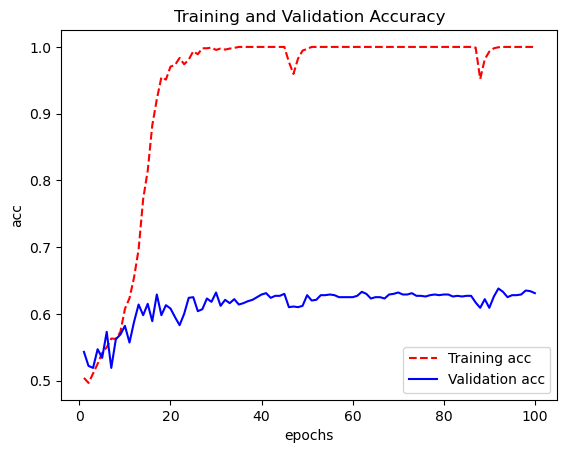

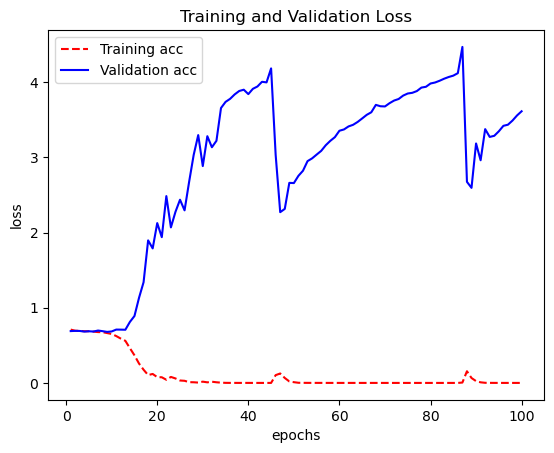

<Figure size 640x480 with 0 Axes>

In [16]:
acc      = history.history[     'acc' ]
val_acc  = history.history[ 'val_acc' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epochs del eje X

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and Validation Accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_loss ,  'b', label='Validation acc' )
plt.title ('Training and Validation Loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()


In [17]:
test_lost, test_acc= model.evaluate(test_generator)
print ("Test Accuracy:", test_acc)

50/50 [==============================] - 4s 89ms/step - loss: 3.5229 - acc: 0.6200
Test Accuracy: 0.6200000047683716


1/1 [==============================] - 0s 27ms/step
[[1.]]


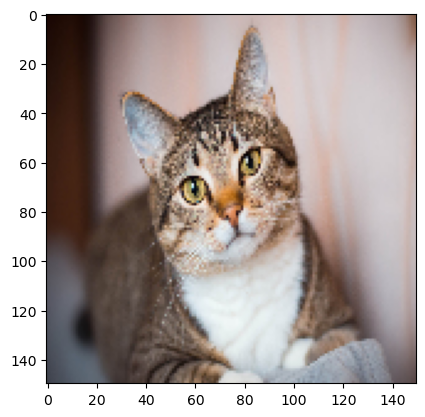

gatocom.jpg IS A DOG


In [20]:
import numpy as np

# from google.colab import files
from tensorflow.keras.preprocessing import image

# uploaded=files.upload()
file='gatocom.jpg'

path='/home/mstorresh/ML/libro_Jordi/' + file
img=image.load_img(path, target_size=(150, 150))

x=image.img_to_array(img)
image=np.expand_dims(x, axis=0)  

classes = model.predict(image)
print(classes)

plt.imshow(img)
plt.show()

if classes>0: print( file + " IS A DOG")
else: print( file + " IS A CAT")

In [22]:
# so we have an overfit 